In [1]:
import sys

sys.path.insert(0, "..")

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from diffprivlib.models import LinearRegression as LinearRegressionDP
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression as LinearReressionNotDP
from sklearn.preprocessing import MinMaxScaler

from synthflow.birth import BOUNDARIES
from synthflow.evaluation.preperation import numerify
from tests.utils import PROCESSED_REAL_DATA_200K_PATH, SYNTH_DATA_200K_PATH

In [2]:
def run_lr_experiment(X, y, bounds_X, bounds_y):
    coef_not_dp = LinearReressionNotDP().fit(X, y).coef_

    coef_not_dp

    _, ax = plt.subplots(1, figsize=(5, 5))

    for epsilon in [0.01, 0.05, 0.1, 0.25, 0.5, 0.65, 1]:
        coefs_dp = np.array(
            [
                LinearRegressionDP(
                    epsilon=epsilon, bounds_X=bounds_X, bounds_y=bounds_y
                )
                .fit(X, y)
                .coef_
                for _ in range(100)
            ]
        )

        sns.ecdfplot(
            np.abs((coefs_dp - coef_not_dp) / coef_not_dp).max(axis=1).round(1),
            label=epsilon,
            ax=ax,
        )

    ax.axvline(0.7, color="k", linestyle="--")
    ax.set_xlim(0, 2)
    plt.legend()
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))


def run_lr_experiment_on_df(path):
    df = pd.read_pickle(path)

    df = numerify(df)

    X = df.drop("birth_weight", axis=1)
    y = df["birth_weight"]

    bounds = [BOUNDARIES[column] for column in df.columns]
    lower, upper = zip(*bounds)
    bounds_X, bounds_y = (lower[:-1], upper[:-1]), (lower[-1], upper[-1])

    run_lr_experiment(X, y, bounds_X, bounds_y)

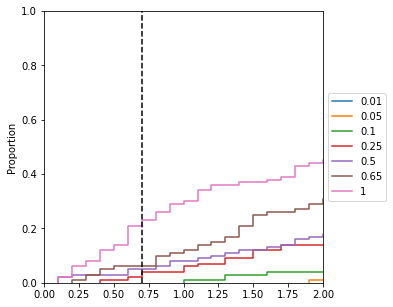

In [3]:
X, y = make_regression(n_samples=100000, n_features=5, n_informative=5)

X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y.reshape(-1, 1)).flatten()

run_lr_experiment(X, y, (0, 1), (0, 1))

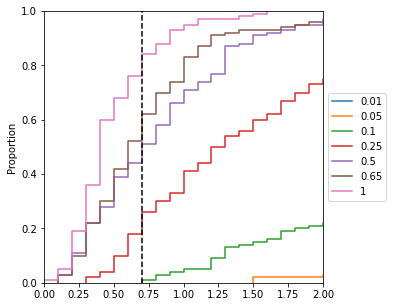

In [4]:
run_lr_experiment_on_df(PROCESSED_REAL_DATA_200K_PATH)

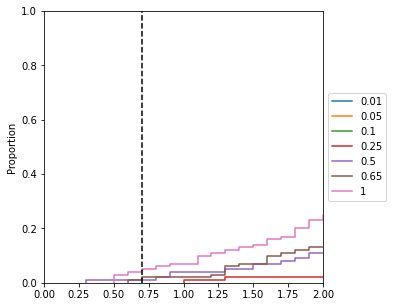

In [5]:
run_lr_experiment_on_df(SYNTH_DATA_200K_PATH)